In [1]:
# import numpy as np
# import os
# from scipy.misc import imread, imresize
# import matplotlib.pyplot as plt
# from glob import glob

# #Read all the jpg image directory
# def load_image(image_path, image_size):
#     file_name=glob(image_path+"/*jpg")
#     sample = []
#     for file in file_name:
#         pic = imread(file).astype(np.float32)
#         pic = imresize(pic, (image_size, image_size)).astype(np.float32)
#         sample.append(pic)

#     sample = np.array(sample)
#     return sample

# if __name__=='__main__':
#     samples=load_image("C:/Users/User/anacon_csc649_workspace/test_project/American Sign Language/alpha_train/alpha_train",150)
#          # Display the first picture
#     pic=samples[:1,:,:,:]
#     pic=np.reshape(pic,(150,150,3)).astype(np.uint8)
#     plt.imshow(pic)
#     plt.show()

In [2]:
# train_data = np.array(train_dir , dtype='float32')

# class_names= ['A','B','C','D','E','F','G','H','I','J','K','L','M','N','O','P','Q','R','S','T','U','V','W','X','Y','Z','del','nothing','space']
# i = random.randint(1,train_dir.shape[0])
# fig1 ,ax1 =plt.subplots(figsize=(2,2))
# plt.imshow(train_data[i,1:].reshape((28,28)),cmap='gray' )
# print("Label for image is : ", class_names[int(train_data[i,0])] )

In [4]:
from __future__ import absolute_import, division, print_function
import tensorflow as tf

from numpy.random import seed
import cv2
import os
import numpy as np
import skimage
from skimage.transform import resize
import csv
import itertools
from tqdm import tqdm
from glob import glob
from matplotlib import pyplot as plt
from numpy import floor
import random
import tensorflow.compat.v1 as tf
import keras





tf.disable_v2_behavior()
tf.logging.set_verbosity(tf.logging.ERROR)


# Function to load the images
def load_images(directory):
    images = []
    labels = []
    for idx, label in enumerate(unique_labels):
        print(label, " is ready to load")
        for file in os.listdir(directory + "/" + label):
            filepath = directory + "/" + label + "/" + file
            image = cv2.resize(cv2.imread(filepath), (64, 64))
            images.append(image)
            labels.append(idx)
    images = np.array(images)
    labels = np.array(labels)
    return (images, labels)

Instructions for updating:
non-resource variables are not supported in the long term


In [5]:
# Load all the iamges
train_dir = 'C:/Users/User/anacon_csc649_workspace/test_project/American Sign Language/alpha_train/alpha_train'
unique_labels = sorted(os.listdir(train_dir))

images, labels = load_images(directory=train_dir)
print("Data has been loaded")

A  is ready to load
B  is ready to load
C  is ready to load
D  is ready to load
E  is ready to load
F  is ready to load
G  is ready to load
H  is ready to load
I  is ready to load
J  is ready to load
K  is ready to load
L  is ready to load
M  is ready to load
N  is ready to load
O  is ready to load
P  is ready to load
Q  is ready to load
R  is ready to load
S  is ready to load
T  is ready to load
U  is ready to load
V  is ready to load
W  is ready to load
X  is ready to load
Y  is ready to load
Z  is ready to load
del  is ready to load
nothing  is ready to load
space  is ready to load
Data has been loaded


In [6]:
# Split the training and the testing datasets
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(images,
                                                    labels,
                                                    test_size=0.2,
                                                    stratify=labels)

n = len(unique_labels)
train_n = len(x_train)
test_n = len(x_test)

print("Total number of symbols: ", n)
print("Number of training images: ", train_n)
print("Number of testing images: ", test_n)

Total number of symbols:  29
Number of training images:  34800
Number of testing images:  8700


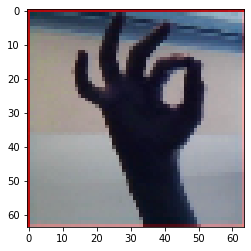

In [7]:
index=0
img =plt.imshow( x_train[index] )

In [8]:
print('The image label is : ' , y_train[index])

The image label is :  5


In [ ]:
#ni ade masok code yg plant and few generators

In [ ]:
#https://blog.keras.io/building-powerful-image-classification-models-using-very-little-data.html

#Btach Size
BS = 32
#Set the number of Epochs
EPOCHS = 25
#Learning Rate
INIT_LR = 1e-3    
    
#bende ni amik dari https://www.kaggle.com/kundankumarmandal/alphabet-recognition-sign-language/data    
aug = ImageDataGenerator(samplewise_center=True, 
                                    samplewise_std_normalization=True, 
                                    validation_split=0.2)


from keras.layers import Conv2D, MaxPooling2D
from keras.layers import Conv2D, Dense, Dropout, Flatten
from keras.layers import Flatten, Dense
from keras.models import Sequential

model = Sequential()
model.add(Conv2D(filters = 64, kernel_size = 5, padding = 'same', activation = 'relu', 
                 input_shape = (64, 64, 3)))
model.add(Conv2D(filters = 64, kernel_size = 5, padding = 'same', activation = 'relu'))
model.add(MaxPooling2D(pool_size = (4, 4)))
model.add(Dropout(0.5))
model.add(Conv2D(filters = 128 , kernel_size = 5, padding = 'same', activation = 'relu'))
model.add(Conv2D(filters = 128 , kernel_size = 5, padding = 'same', activation = 'relu'))
model.add(MaxPooling2D(pool_size = (4, 4)))
model.add(Dropout(0.5))
model.add(Conv2D(filters = 256 , kernel_size = 5, padding = 'same', activation = 'relu'))
model.add(Dropout(0.5))
model.add(Flatten())
model.add(Dense(29, activation='softmax'))

model.summary()

#Optimization
#Learning Rate and Epochs is defined above
opt = Adam(lr=INIT_LR, decay=INIT_LR / EPOCHS)
#For future reference
#Nice Article explaining binary_crossentropy loss 
#Link : https://towardsdatascience.com/understanding-binary-cross-entropy-log-loss-a-visual-explanation-a3ac6025181a
model.compile(loss="binary_crossentropy", optimizer=opt,metrics=["accuracy"])
#Next step is to train the network
print("[INFO] training network...")


history = model.fit_generator(
    aug.flow(x_train, y_train, batch_size=BS),
    validation_data=(x_test, y_test),
    steps_per_epoch=len(x_train) // BS,
    epochs=EPOCHS, verbose=1
    )

#Note: model.fit() is used for small data
#.fit is used when the entire training dataset can fit into the memory and no data augmentation is applied.
#whereas model.fit_generator() can be used for augmented data as done here
#Augmented data helps to analyse deep learning models better 
#.fit_generator is used when either we have a huge dataset to fit into our memory or when data augmentation needs to be applied.



#hist = model.fit(X_train, y_train, epochs = 5, batch_size = 64)    


score = model.evaluate(x = X_test, y = y_test, verbose = 0)
print('Accuracy for test images:', round(score[1]*100, 3), '%')



from sklearn.metrics import confusion_matrix
import itertools

y_test_pred = model.predict(X_test, batch_size = 64, verbose = 0)
plot_confusion_matrix(y_test, y_test_pred)



In [ ]:
#https://www.kaggle.com/kundankumarmandal/alphabet-recognition-sign-language/data

plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

In [ ]:
# from sklearn.preprocessing import StandardScaler

# sc= StandardScaler()
# x_train=sc.fit_transform(x_train)
# x_test=sc.fit_transform(x_test)

# from sklearn.neighbors import KNeighborsClassifier

# knn_model = KNeighborsClassifier(n_neighbors=5 ,metric='minkowski',p=2)
# knn_model.fit(x_train, y_train)

# #classification/predict
# y_pred = knn_model.predict(x_test)
# y_pred


# from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
# print(classification_report(y_test,y_pred))
# print(confusion_matrix(y_test,y_pred))
# print("Accuracy Score:",accuracy_score(y_test,y_pred)*100)




NameError: name 'target_test' is not defined

In [11]:
#SVM

# x_train = x_train.reshape(34800,3*64*64)
# x_test = x_test.reshape(8700,3*64*64)

# from sklearn.svm import SVC
# svclass = SVC(kernel='poly')
# svclass
# svclass.fit(x_train,y_train)


# y_pred = svclass.predict(x_test)
# y_pred
# y_pred.shape


# from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
# print(classification_report(y_test,y_pred))

# print(confusion_matrix(target_test,y_pred))
# print("Accuracy Score:",accuracy_score(target_test,y_pred)


MemoryError: Unable to allocate 3.19 GiB for an array with shape (34800, 12288) and data type float64

In [ ]:
# #sepatutnya sblm train test split
# label_list  = enumerate(sorted(os.listdir(train_dir))
# from sklearn.preprocessing import LabelBinarizer
#  #One hot encoding
# #Images as arrays are also hard to analyse
# #Converting them to vectors makes it easier for analysis
# #Conversion to Vector                      
# label_binarizer = LabelBinarizer()
# image_labels = label_binarizer.fit_transform(label_list)
                        
# #Getting the length of the label classes 
# n_classes = len(label_binarizer.classes_)
                        
# #Printing the labels
# print(label_binarizer.classes_)                  

# #nk tngk mcm train test punya data
# print(X_train.shape,y_train.shape,X_test.shape,y_test.shape)

In [ ]:
# IMAGE_DIMS = (96, 96, 3)

# labels = []
# for imagePath in unique_labels:
#     labels = []
#     data = []
#     image = cv2.imread(imagePath)
#     image = cv2.resize(image, (IMAGE_DIMS[1], IMAGE_DIMS[0]))
#     image = img_to_array(image)
#     data.append(image)

#     l = label = imagePath.split(os.path.sep)[-2]
#    labels.append(l)

In [ ]:
# np.random.seed(5) 
# tf.set_random_seed(2)
# %matplotlib inline


# y_train = keras.utils.to_categorical(y_train)
# y_test = keras.utils.to_categorical(y_test)

# print(y_train[0])
# print(len(y_train[0]))


In [ ]:
# x_train = x_train.astype('float32')/255.0
# x_test = x_test.astype('float32')/255.0


In [ ]:
# from keras.layers import Conv2D, MaxPooling2D
# from keras.layers import Conv2D, Dense, Dropout, Flatten
# from keras.layers import Flatten, Dense
# from keras.models import Sequential

# model = Sequential()
# model.add(Conv2D(filters = 64, kernel_size = 5, padding = 'same', activation = 'relu', 
#                  input_shape = (64, 64, 3)))
# model.add(Conv2D(filters = 64, kernel_size = 5, padding = 'same', activation = 'relu'))
# model.add(MaxPooling2D(pool_size = (4, 4)))
# model.add(Dropout(0.5))
# model.add(Conv2D(filters = 128 , kernel_size = 5, padding = 'same', activation = 'relu'))
# model.add(Conv2D(filters = 128 , kernel_size = 5, padding = 'same', activation = 'relu'))


# model.add(MaxPooling2D(pool_size = (4, 4)))
# model.add(Dropout(0.5))
# model.add(Conv2D(filters = 256 , kernel_size = 5, padding = 'same', activation = 'relu'))
# model.add(Dropout(0.5))
# model.add(Flatten())
# model.add(Dense(29, activation='softmax'))

# model.summary()


# model.compile(optimizer =  'rmsprop', loss = 'categorical_crossentropy', metrics = ['categorical_accuracy'])

# hist = model.fit(x_train, y_train, epochs = 5, batch_size=64 )

In [ ]:
# #Part 2 Fittting the CNN to the image
# from keras.preprocessing.image import ImageDataGenerator

# train_datagen = ImageDataGenerator(
#         rescale=1./255,
#         shear_range=0.2,
#         zoom_range=0.2,
#         horizontal_flip=True)

# test_datagen = ImageDataGenerator(rescale=1./255)


# training_set = train_datagen.flow(
#         'Dataset/training_set',
#         target_size=(64, 64),
#         batch_size=32,
#         class_mode='categorical')


# test_set = test_datagen.flow(
#         'Dataset/test_set',l
#         target_size=(64, 64),
#         batch_size=32,
#         class_mode='categorical')


# model = classifier.fit_generator(
#         training_set,
#         steps_per_epoch=800,
#         epochs=25,
#         validation_data = test_set,
#         validation_steps = 6500
#       )


# # #Saving the model
# # import h5py
# # classifier.save('Trained_model.h5')



# print(model.history.keys())
# import matplotlib.pyplot as plt
# # summarize history for accuracy
# plt.plot(model.history['acc'])
# plt.plot(model.history['val_acc'])
# plt.title('model accuracy')
# plt.ylabel('accuracy')
# plt.xlabel('epoch')
# plt.legend(['train', 'test'], loc='upper left')
# plt.show()
# # summarize history for loss

# plt.plot(model.history['loss'])
# plt.plot(model.history['val_loss'])
# plt.title('model loss')
# plt.ylabel('loss')
# plt.xlabel('epoch')
# plt.legend(['train', 'test'], loc='upper left')
# plt.show()

In [ ]:
# #CNN
# from keras.models import Sequential
# from keras.layers import Convolution2D
# from keras.layers import MaxPooling2D
# from keras.layers import Flatten
# from keras.layers import Dense, Dropout
# from keras.optimizers import SGD


# # Initialing the CNN
# classifier = Sequential()

# # Step 1 - Convolutio Layer 
# classifier.add(Convolution2D(32, 3,  3, input_shape = (64, 64, 3), activation = 'relu'))

# #step 2 - Pooling
# classifier.add(MaxPooling2D(pool_size =(2,2)))

# # Adding second convolution layer
# classifier.add(Convolution2D(32, 3,  3, activation = 'relu'))
# classifier.add(MaxPooling2D(pool_size =(2,2)))

# #Adding 3rd Concolution Layer
# classifier.add(Convolution2D(64, 3,  3, activation = 'relu'))
# classifier.add(MaxPooling2D(pool_size =(2,2)))


# #Step 3 - Flattening
# classifier.add(Flatten())


# #Step 4 - Full Connection
# classifier.add(Dense(256, activation = 'relu'))
# classifier.add(Dropout(0.5)) # randomly disconnecting nodes from the current layer to the next layer helps the network to reduce overfitting
# classifier.add(Dense(26, activation = 'softmax'))

# #classifier.summary()

# #Compiling The CNN
# classifier.compile(
#               optimizer = optimizers.SGD(lr = 0.01),
#               loss = 'categorical_crossentropy',
#               metrics = ['accuracy'])

# #fit model 
# history = classifier.fit
# (xtrain,ytrain, epochs=numepochs, class_weight=classweight, validation_data=(xtest,ytest), verbose=1,callbacks = [MetricsCheckpoint('logs')])

In [ ]:
# from sklearn.svm import SVC
# svclass = SVC(kernel='linear')
# svclass.fit(x_train,y_train)
# y_pred = svclass.predict( x_test)
# y_pred
# from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
# print(classification_report(target_test,y_pred))
# print(confusion_matrix(target_test,y_pred))
# print("Accuracy Score:",accuracy_score(target_test,y_pred))